In [4]:
# Wine Quality Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html
# https://files.grouplens.org/datasets/movielens/ml-32m.zip 

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

C:\Users\manta\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\manta\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
# import numpy package for arrays and stuff
import numpy as np
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
# import pandas for importing csv files
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from Skriptai.manofunkcijos import *

In [6]:
df = pd.read_csv(path+"/WineQT.csv"); df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
ndf = df

In [8]:
X = ndf.drop(columns=['Id','quality'])
y = ndf['quality']
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.15,
random_state=23)

In [9]:
regressor = DecisionTreeClassifier(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
acc = regressor.score(X_test, y_test)*100.0
print("Decision Tree Regressor model accuracy (in %):", acc)

Decision Tree Regressor model accuracy (in %): 64.53488372093024


In [10]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 59.883720930232556


Text(0.5, 1.0, 'DecisionTreeRegressor')

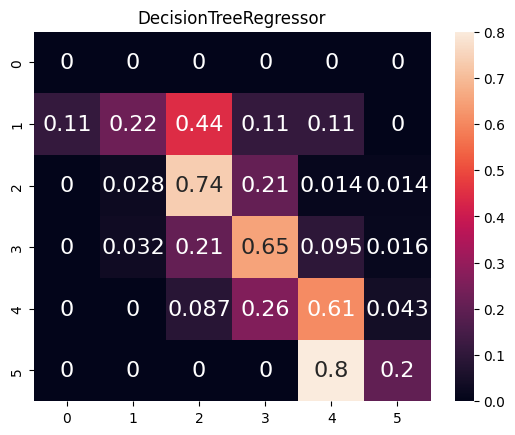

In [11]:
cm = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
plt.title('DecisionTreeRegressor')

Text(0.5, 1.0, 'Logistic')

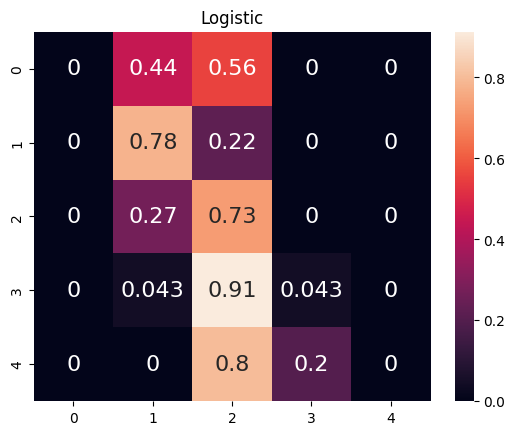

In [12]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
plt.title('Logistic')

In [13]:
#  Movies

In [14]:
links = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/ml-32m/links.csv')
movies = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/ml-32m/movies.csv')
ratings = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/ml-32m/ratings.csv')
tags = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/ml-32m/tags.csv')

In [15]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
87580,292731,26812510,1032473.0
87581,292737,14907358,986674.0
87582,292753,12388280,948139.0
87583,292755,64027,182776.0


In [16]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [17]:
moviesdf = movies['genres'].str.get_dummies('|')

In [18]:
moviesdf

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
87581,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
87582,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
87583,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
mdf = pd.concat([movies, moviesdf], axis = 1); mdf.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
movies_df = mdf.drop(columns=['genres','(no genres listed)']); movies_df

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,292731,The Monroy Affaire (2022),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87581,292737,Shelter in Solitude (2023),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87582,292753,Orca (2023),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87583,292755,The Angry Breed (1968),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
ratings

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [22]:
ratings['datetime'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [23]:
datefrom = datetime(2000,1,1)
dateto = datetime (2010,12,31)
ratings_filtered = ratings.query('datetime > @datefrom & datetime < @dateto')

In [24]:
ratings_group = ratings_filtered.groupby(['movieId'])['rating'].mean().reset_index(); ratings_group

,movieId,rating
0,1,3.874763
1,2,2.996740
2,3,2.912953
3,4,2.665939
4,5,2.810068
...,...,...
14676,82852,3.000000
14677,82854,2.500000
14678,82857,3.000000
14679,82911,3.500000


In [25]:
movies_ratings = pd.merge(left=movies_df, right=ratings_group, on='movieId')

In [26]:
movies_ratings['rating'] = movies_ratings['rating'].apply(lambda x: round(x,2));movies_ratings


,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.87
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2.91
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,2.67
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14676,82852,Little Fockers (2010),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.00
14677,82854,Gulliver's Travels (2010),0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2.50
14678,82857,Sweetgrass (2009),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3.00
14679,82911,"Cowboy and the Lady, The (1938)",0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,3.50


In [27]:
tags_df = tags

In [28]:
tags_df.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [29]:
# tags_df['tags'] =  tags_df.groupby(['movieId'])['tag'].apply(lambda x: [str(x)]).apply('|'.join).apply(lambda x: x.lower())
tags_df['tag'] = tags_df['tag'].apply(lambda x: str(x).lower())
tags_df = tags_df.groupby('movieId').apply(lambda x: '|'.join(x.tag)).reset_index()
tags_df['tags'] = tags_df[0]
# tags_df = tags_df.drop(columns=0)
# tags_df = tags_df[['movieId', 'tags']].drop_duplicates(); tags_df

In [30]:
movies_ratings_tags = pd.merge(left=movies_ratings, right=tags_df, on='movieId'); movies_ratings_tags
movies_ratings_tags.dropna()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,0,tags
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,3.87,children|disney|animation|children|disney|disn...,children|disney|animation|children|disney|disn...
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3.00,robin williams|fantasy|robin williams|time tra...,robin williams|fantasy|robin williams|time tra...
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,2.91,comedinha de velhinhos engraãƒâ§ada|comedinha ...,comedinha de velhinhos engraãƒâ§ada|comedinha ...
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,2.67,characters|slurs|based on novel or book|chick ...,characters|slurs|based on novel or book|chick ...
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.81,fantasy|pregnancy|remake|family|steve martin|s...,fantasy|pregnancy|remake|family|steve martin|s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13906,82852,Little Fockers (2010),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3.00,barbara streisand|ben stiller|comedy|few funny...,barbara streisand|ben stiller|comedy|few funny...
13907,82854,Gulliver's Travels (2010),0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.50,few funny scenes|based on a book|jonathan swif...,few funny scenes|based on a book|jonathan swif...
13908,82857,Sweetgrass (2009),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,3.00,montana|beautiful scenery|beautifully filmed|b...,montana|beautiful scenery|beautifully filmed|b...
13909,82911,"Cowboy and the Lady, The (1938)",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,3.50,gary cooper|blind date|maid|rodeo|bd-r,gary cooper|blind date|maid|rodeo|bd-r


In [31]:
def metai(x):
    try:
        f = int(x.split('(')[1].replace(')',''))
        return int(f)
    except:
        return None

In [32]:
movies_ratings_tags['Metai'] = movies_ratings_tags['title'].apply(metai); movies_ratings_tags

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,0,tags,Metai
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,3.87,children|disney|animation|children|disney|disn...,children|disney|animation|children|disney|disn...,1995.0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,3.00,robin williams|fantasy|robin williams|time tra...,robin williams|fantasy|robin williams|time tra...,1995.0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,2.91,comedinha de velhinhos engraãƒâ§ada|comedinha ...,comedinha de velhinhos engraãƒâ§ada|comedinha ...,1995.0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,2.67,characters|slurs|based on novel or book|chick ...,characters|slurs|based on novel or book|chick ...,1995.0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2.81,fantasy|pregnancy|remake|family|steve martin|s...,fantasy|pregnancy|remake|family|steve martin|s...,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13906,82852,Little Fockers (2010),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3.00,barbara streisand|ben stiller|comedy|few funny...,barbara streisand|ben stiller|comedy|few funny...,2010.0
13907,82854,Gulliver's Travels (2010),0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2.50,few funny scenes|based on a book|jonathan swif...,few funny scenes|based on a book|jonathan swif...,2010.0
13908,82857,Sweetgrass (2009),0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,3.00,montana|beautiful scenery|beautifully filmed|b...,montana|beautiful scenery|beautifully filmed|b...,2009.0
13909,82911,"Cowboy and the Lady, The (1938)",0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,3.50,gary cooper|blind date|maid|rodeo|bd-r,gary cooper|blind date|maid|rodeo|bd-r,1938.0


In [33]:
text = 'claude'
movies_ratings_tags['Find_value'] = movies_ratings_tags['tags'].apply(lambda x: True if text in x else False); movies_ratings_tags

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Thriller,War,Western,rating,0,tags,Metai,Find_value
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,3.87,children|disney|animation|children|disney|disn...,children|disney|animation|children|disney|disn...,1995.0,False
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,3.00,robin williams|fantasy|robin williams|time tra...,robin williams|fantasy|robin williams|time tra...,1995.0,False
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,1,0,0,0,0,2.91,comedinha de velhinhos engraãƒâ§ada|comedinha ...,comedinha de velhinhos engraãƒâ§ada|comedinha ...,1995.0,False
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,1,0,0,0,0,2.67,characters|slurs|based on novel or book|chick ...,characters|slurs|based on novel or book|chick ...,1995.0,False
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,2.81,fantasy|pregnancy|remake|family|steve martin|s...,fantasy|pregnancy|remake|family|steve martin|s...,1995.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13906,82852,Little Fockers (2010),0,0,0,0,1,0,0,0,...,0,0,0,0,0,3.00,barbara streisand|ben stiller|comedy|few funny...,barbara streisand|ben stiller|comedy|few funny...,2010.0,False
13907,82854,Gulliver's Travels (2010),0,1,0,0,1,0,0,0,...,0,0,0,0,0,2.50,few funny scenes|based on a book|jonathan swif...,few funny scenes|based on a book|jonathan swif...,2010.0,False
13908,82857,Sweetgrass (2009),0,1,0,0,0,0,1,0,...,0,0,0,0,1,3.00,montana|beautiful scenery|beautifully filmed|b...,montana|beautiful scenery|beautifully filmed|b...,2009.0,False
13909,82911,"Cowboy and the Lady, The (1938)",0,0,0,0,1,0,0,1,...,1,0,0,0,1,3.50,gary cooper|blind date|maid|rodeo|bd-r,gary cooper|blind date|maid|rodeo|bd-r,1938.0,False


In [34]:
moviesdf.columns.tolist()[1:]

['Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [35]:
movies_ratings_full = pd.merge(left=ratings, right=movies_df, on='movieId'); movies_ratings_full

,userId,movieId,rating,timestamp,datetime,title,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,17,4.0,944249077,1999-12-03 21:24:37,Sense and Sensibility (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,25,1.0,944250228,1999-12-03 21:43:48,Leaving Las Vegas (1995),0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,29,2.0,943230976,1999-11-22 02:36:16,"City of Lost Children, The (Cité des enfants p...",0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,30,5.0,944249077,1999-12-03 21:24:37,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,32,5.0,943228858,1999-11-22 02:00:58,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000199,200948,79702,4.5,1294412589,2011-01-07 17:03:09,Scott Pilgrim vs. the World (2010),1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
32000200,200948,79796,1.0,1287216292,2010-10-16 11:04:52,Centurion (2010),1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
32000201,200948,80350,0.5,1294412671,2011-01-07 17:04:31,Vampires Suck (2010),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32000202,200948,80463,3.5,1350423800,2012-10-17 00:43:20,"Social Network, The (2010)",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
movies_ratings_full.drop(columns=['movieId','timestamp','datetime','title']).columns

Index(['userId', 'rating', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [37]:

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import MinMaxScaler



# df = movies_ratings_full.drop(columns=['movieId','timestamp','datetime','title'])

# # Pašaliname "userId" stulpelį, nes jis nereikalingas mokymui
# X = df.drop(columns=['userId', 'rating'])
# y = df['rating']

# # Normalizuojame žanrų duomenis, kad modelis veiktų geriau
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Skirstome duomenis į treniravimo ir testavimo rinkinius
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Sukuriame ir treniruojame regresijos modelį
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Numatomos reikšmės testavimo rinkinyje
# y_pred = model.predict(X_test)

# # Pasižiūrime modelio koeficientus, kad nustatytume, kurie žanrai labiausiai lemia vartotojų įvertinimus
# genre_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

# print("\nModelio koeficientai (žanrų svarba):")
# print(genre_importance)

# # Analizuojame kiekvieno vartotojo prioritetinius žanrus
# user_genre_preferences = {}
# for user_id, group in df.groupby('userId'):
#     user_X = group.drop(columns=['userId', 'rating'])
#     user_y = group['rating']

#     # Pritaikome modelį kiekvieno vartotojo duomenims
#     user_X_scaled = scaler.transform(user_X)
#     user_genre_weights = model.predict(user_X_scaled)

#     # Apskaičiuojame kiekvieno žanro procentinį pasirinkimą
#     genre_weights = user_X.mul(user_genre_weights, axis=0).sum()
#     genre_percentages = (genre_weights / genre_weights.sum()) * 100

#     user_genre_preferences[user_id] = genre_percentages.sort_values(ascending=False)

# # Atspausdiname kiekvieno vartotojo žanrų pasirinkimus
# for user_id, preferences in user_genre_preferences.items():
#     print(f"\nVartotojas {user_id} labiausiai renkasi šiuos žanrus:")
#     print(preferences)

# # Paprastesnė analizė: tiesioginis žanrų pasikartojimų skaičiavimas
# def simple_genre_analysis(df):
#     user_genre_counts = {}
#     for user_id, group in df.groupby('userId'):
#         genre_totals = group.drop(columns=['userId', 'rating']).sum()
#         genre_percentages = (genre_totals / genre_totals.sum()) * 100
#         user_genre_counts[user_id] = genre_percentages.sort_values(ascending=False)
#     return user_genre_counts

# simple_preferences = simple_genre_analysis(df)

# for user_id, preferences in simple_preferences.items():
#     print(f"\n(Paprasta analizė) Vartotojas {user_id} labiausiai renkasi šiuos žanrus:")
#     print(preferences)

In [38]:
df = movies_ratings_full.drop(columns=['movieId','timestamp','datetime','title'])

def find_user_genre_preferences(df, threshold=30):
    user_preferences = []
    for user_id, group in df.groupby('userId'):
        genre_totals = group.drop(columns=['userId', 'rating']).sum()
        genre_percentages = (genre_totals / genre_totals.sum()) * 100
        preferred_genres = genre_percentages[genre_percentages >= threshold].index.tolist()
        user_preferences.append({'userId': user_id, 'preferredGenres': preferred_genres})
    return pd.DataFrame(user_preferences)

user_genre_df = find_user_genre_preferences(df)

print(user_genre_df)

        userId preferredGenres
0            1         [Drama]
1            2              []
2            3              []
3            4              []
4            5              []
...        ...             ...
200943  200944              []
200944  200945              []
200945  200946              []
200946  200947              []
200947  200948              []

[200948 rows x 2 columns]


In [39]:
# Sukuriame funkciją, kuri randa kiekvieno vartotojo dažniausiai pasirenkamą žanrą
def find_user_top_genre(df):
    user_preferences = []
    for user_id, group in df.groupby('userId'):
        genre_totals = group.drop(columns=['userId', 'rating']).sum()
        top_genre = genre_totals.idxmax()  # Randa žanrą su didžiausia suma
        user_preferences.append({'userId': user_id, 'topGenre': top_genre})
    return pd.DataFrame(user_preferences)

# Randame kiekvieno vartotojo dažniausiai pasirenkamą žanrą
user_genre_df = find_user_top_genre(df)

# Atspausdiname rezultatą
print(user_genre_df)

        userId  topGenre
0            1     Drama
1            2    Comedy
2            3    Action
3            4  Thriller
4            5  Thriller
...        ...       ...
200943  200944    Action
200944  200945     Drama
200945  200946     Drama
200946  200947     Drama
200947  200948    Comedy

[200948 rows x 2 columns]


In [52]:
def save_dataframe_to_sqlite(df, db_name, table_name, if_exists="replace"):
    import sqlite3
    """
    Įrašo DataFrame į SQLite duomenų bazę.

    Args:
        df (pd.DataFrame): Duomenys, kuriuos reikia įrašyti.
        db_name (str): SQLite duomenų bazės failo pavadinimas.
        table_name (str): Lentelės pavadinimas, kur bus įrašyti duomenys.
        if_exists (str): Veiksmas, jei lentelė jau egzistuoja. 
                         Galimi variantai: 'fail', 'replace', 'append'.
                         Numatytoji reikšmė yra 'replace'.

    Returns:
        None
    """
    try:
        # Sukuriamas ryšys su SQLite duomenų baze
        conn = sqlite3.connect(db_name)
        # Duomenų įrašymas į nurodytą lentelę
        df.to_sql(table_name, conn, if_exists=if_exists, index=False)
        print(f"DataFrame sėkmingai įrašytas į '{db_name}' duomenų bazės '{table_name}' lentelę.")
    except Exception as e:
        print(f"Klaida įrašant DataFrame į SQLite: {e}")
    finally:
        # Uždaromas ryšys su duomenų baze
        conn.close()

db_path = '../../../web_scrap.db'

save_dataframe_to_sqlite(df=user_genre_df, db_name=db_path, table_name='user_genre_df')

DataFrame sėkmingai įrašytas į '../../../web_scrap.db' duomenų bazės 'user_genre_df' lentelę.


In [53]:

query = 'SELECT * FROM user_genre_df;'  
user_genre_df = query_to_dataframe(db_path,query)

In [54]:
user_genre_df

,userId,topGenre
0,1,Drama
1,2,Comedy
2,3,Action
3,4,Thriller
4,5,Thriller
...,...,...
200943,200944,Action
200944,200945,Drama
200945,200946,Drama
200946,200947,Drama
